# Estimaciones de Riesgo Extremo

---

## I. Supuesto de Normalidad en Retornos Financieros

Una suposición común en modelos financieros clásicos (como CAPM, Black-Scholes, etc.) es que los retornos de los activos financieros siguen una distribución normal o gaussiana. Esta hipótesis permite derivar fórmulas analíticas simples, pero no siempre se ajusta bien a los datos reales.

**Implicancias de normalidad:**

- La mayoría de los retornos se concentran alrededor de la media.
- Eventos extremos (grandes ganancias o pérdidas) son poco frecuentes (Kurtosis = 3).
- La distribución de los retornos son simétricos.

**Sin embargo, en los mercados reales:**

- Las distribuciones de retornos suelen tener **colas gruesas** (más eventos extremos).
- También pueden presentar **asimetría**, es decir, tener más probabilidad de eventos extremos en una dirección (ganancias o pérdidas).

Por tanto, es fundamental utilizar métricas que capturen estos comportamientos no normales para medir el riesgo de manera adecuada.

---

## II. Skewness o Coeficiente de Asimetría

La **skewness** o **coeficiente de asimetría** mide la falta de simetría en una distribución de probabilidad respecto a su media:

$$
S(X) = \frac{\mathbb{E}[(X - \mu)^3]}{\sigma^3}
$$

Donde:
- $\mu$: media de $X$
- $\sigma$: desviación estándar de $X$

Interpretación:
- $ S = 0 $: distribución simétrica (como la normal)
- $ S > 0 $: cola más larga a la derecha/sesgo a la derecha (posibles ganancias extremas)
- $ S < 0 $: cola más larga a la izquierda/sesgo a la izquierda (posibles pérdidas extremas)

---

## III. Kurtosis o Curtosis

La **kurtosis** mide la propensión de una distribución a generar valores extremos. Está relacionada con la concentración de probabilidad en las colas:

$$
K(X) = \frac{\mathbb{E}[(X - \mu)^4]}{\sigma^4}
$$

Interpretación:
- $Kurtosis = 3$: distribución normal → mesocúrtica
- $Kurtosis > 3$: colas más pesadas → leptocúrtica
- $Kurtosis < 3$: colas más livianas → platicúrtica

Se suele utilizar la **exceso de kurtosis**: $ K - 3 $, para compararla directamente con la normal.

**Importante:** la kurtosis no mide directamente el "pico" de la distribución, sino la frecuencia de valores extremos.

---

## IV. Prueba de Jarque-Bera (JB)

La prueba de **Jarque-Bera** combina skewness y kurtosis para evaluar si una variable aleatoria sigue una distribución normal.

$$
JB = \frac{n}{6} \left( S^2 + \frac{(K - 3)^2}{4} \right)
$$

Donde:
- $ n $: número de observaciones
- $ S $: skewness
- $ K $: kurtosis

Hipótesis:
- $ H_0 $: la variable tiene distribución normal
- $ H_1 $: la variable no tiene distribución normal

Si el estadístico JB es suficientemente grande, se rechaza $ H_0 $.

---

## V. Semivolatilidad (o Semidesviación)

La **semivolatilidad** es la desviación estándar calculada sólo sobre los retornos que están por debajo de un umbral $\tau$ dado, reflejando la preocupación por pérdidas:

$$
\sigma_{semi} = \sqrt{ \frac{1}{N_{semi}} \sum_{R_t < \tau} (R_t - \mu)^2 }
$$

- Si $\tau$ es 0 → se mide la volatilidad de las pérdidas netas
- Si $\tau$ es $ \mu $ → se mide la volatilidad respecto a la media

---

## VI. Valor en Riesgo (VaR)

El **VaR (Value-at-Risk)** mide la pérdida máxima esperada en un horizonte de tiempo dado con un nivel de confianza $ \alpha $:

$$
\text{VaR}_\alpha = - \inf \left\{ x \in \mathbb{R} \,:\, \mathbb{P}(R \leq x) \geq 1 - \alpha \right\}
$$

**Interpretación:** Con un nivel de confianza \( \alpha \), el VaR representa la **pérdida mínima** en el peor \( (1 - \alpha)\% \) de los casos.

**Ejemplo:** Un VaR al 95% de 4% implica que hay un 5% de probabilidad de perder **más del 4%** en un día determinado.

>Nota: Aunque el retorno es negativo, el VaR se reporta en valor absoluto como pérdida positiva.

---

## VII. Valor en Riesgo Condicional (CVaR o Expected Shortfall)

El **CVaR (Conditional Value-at-Risk)** mide la pérdida esperada en los peores casos, es decir, el promedio de las pérdidas más allá del VaR:

$$
\text{CVaR}_\alpha = - \mathbb{E}( R \mid R < -\text{VaR}_\alpha )
$$

**Ventajas:**
- Mide tanto la frecuencia como la magnitud de las pérdidas extremas.
- Es coherente (en el sentido de las medidas de riesgo coherentes de Artzner et al.).

---

## VIII. Métodos para estimar VaR y CVaR

### 1. Método Histórico (No paramétrico)

- Se ordenan los retornos observados y se calcula el percentil $ (1 - \alpha) $.
- No requiere ninguna suposición sobre la forma de la distribución.
- CVaR se calcula como el promedio de los retornos que están por debajo del VaR.


### 2. Método Paramétrico (asumiendo normalidad)

- Supone que los retornos siguen una distribución normal con media $ \mu $ y desviación estándar $ \sigma $. Entonces el VaR se calcula como:

$$
\text{VaR}_\alpha = - \left( \mu + z_\alpha \cdot \sigma \right)
$$

$$
\text{CVaR}_\alpha = - \left( \mu + \frac{ \phi(z_\alpha)}{1-\alpha} \cdot \sigma \right)
$$

Donde:
- $ z_\alpha $: cuantil $ (1 - \alpha) $ de la normal estándar
- $ \phi(.) $: densidad de la normal estándar

> Nota: Este método es sencillo pero poco preciso cuando los retornos presentan colas gruesas o asimetrías.


### 3. Método de Cornish-Fisher (Semi-paramétrico)

Corrige los cuantiles de la normal para incorporar skewness $S$ y kurtosis $K$:

$$
\tilde{z}_\alpha = z_\alpha + \frac{1}{6}(z_\alpha^2 - 1)S 
+ \frac{1}{24}(z_\alpha^3 - 3 z_\alpha)(K - 3) 
- \frac{1}{36}(2z_\alpha^3 - 5z_\alpha)S^2
$$

Luego:

$$
\text{VaR}_\alpha = - (\mu + \tilde{z}_\alpha \cdot \sigma)
$$

>Este método ofrece estimaciones más realistas cuando los datos no siguen una distribución normal (como t-student).

---

---

---

-----------------
### PARTE PRACTICA 


In [1]:
# Librerías a utilizar
import pandas as pd
import numpy as np

import scipy
from scipy import stats

# Gráficos
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker

import seaborn as sns

# Archivo personalizado
import edhec_kit as erk

c:\Users\josec\Desktop\Proyectos\Finance Projects\Project I - Finance\Gestión de Inversiones con Python y ML\edhec_kit.py:96: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if filetype is "returns":
c:\Users\josec\Desktop\Proyectos\Finance Projects\Project I - Finance\Gestión de Inversiones con Python y ML\edhec_kit.py:99: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  elif filetype is "nfirms":
c:\Users\josec\Desktop\Proyectos\Finance Projects\Project I - Finance\Gestión de Inversiones con Python y ML\edhec_kit.py:102: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  elif filetype is "size":


Comparamos distribuciones entre una Variable Normal y Retornos del LargeCap

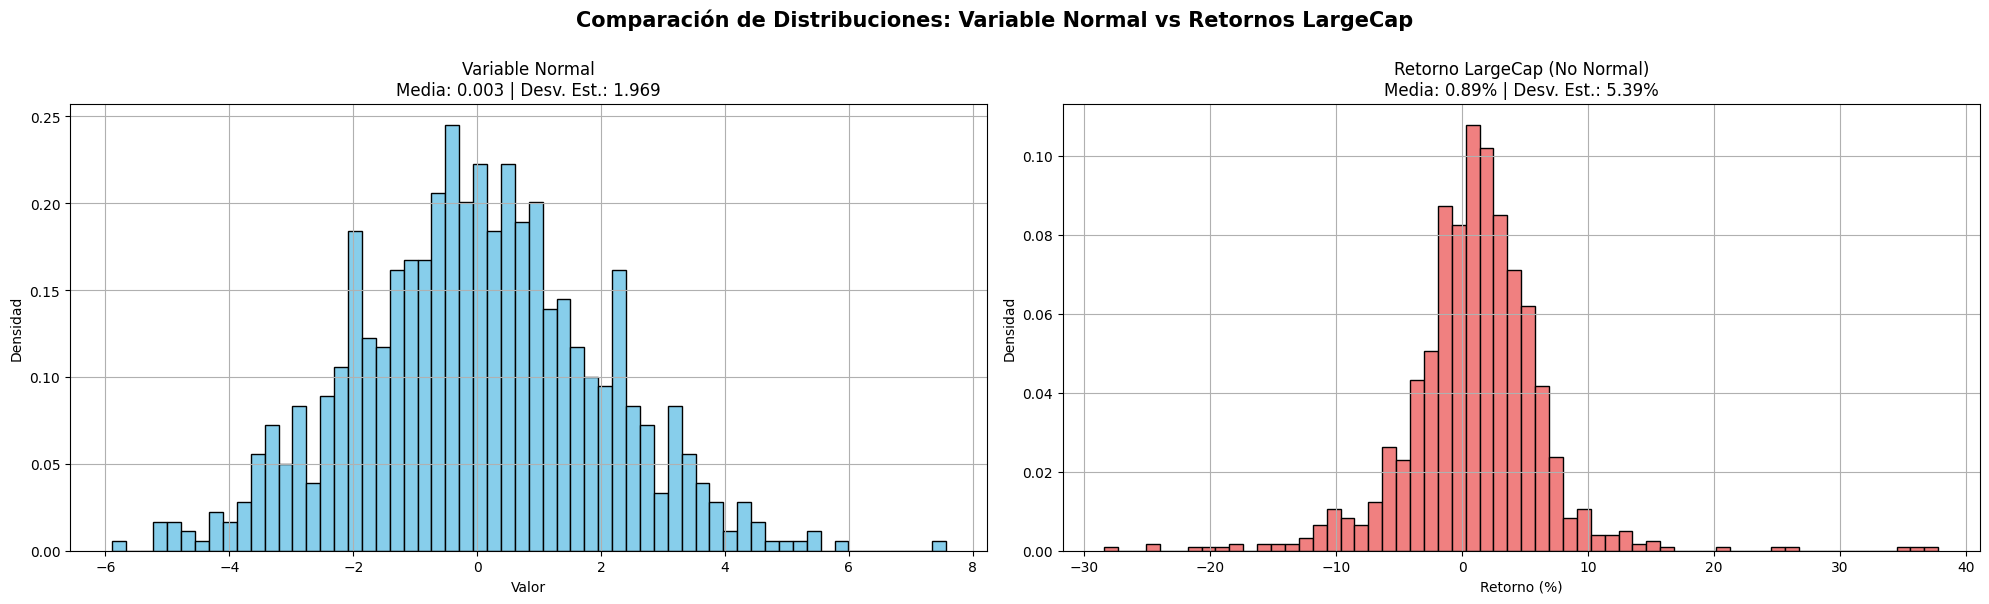

In [2]:
# Variable aleatoria con distribución normal (media 0, desviación estándar 2)
A = pd.DataFrame({'A': np.random.normal(0, 2, size=800)})

# Retornos de LargeCap (no normalmente distribuidos)
B = erk.get_ffme_returns()
B = B['LargeCap']

# Gráfico
plt.figure(figsize=(20, 6))

# Primer gráfico - Variable normal
plt.subplot(1, 2, 1)
plt.hist(A.values, bins=60, density=True, color='skyblue', edgecolor='black')
plt.title(f'Variable Normal\nMedia: {A.mean().values[0]:.3f} | Desv. Est.: {A.std().values[0]:.3f}', fontsize=12)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.grid(True)

# Segundo gráfico - Retorno LargeCap
plt.subplot(1, 2, 2)
plt.hist(B.values * 100, bins=60, density=True, color='lightcoral', edgecolor='black')
plt.title(f'Retorno LargeCap (No Normal)\nMedia: {B.mean()*100:.2f}% | Desv. Est.: {B.std()*100:.2f}%', fontsize=12)
plt.xlabel('Retorno (%)')
plt.ylabel('Densidad')
plt.grid(True)

# Título
plt.suptitle('Comparación de Distribuciones: Variable Normal vs Retornos LargeCap', fontweight='bold', fontsize=15, y=1)

plt.tight_layout()
plt.show()

Calculamos la Skewness y Kurtosis para ambas

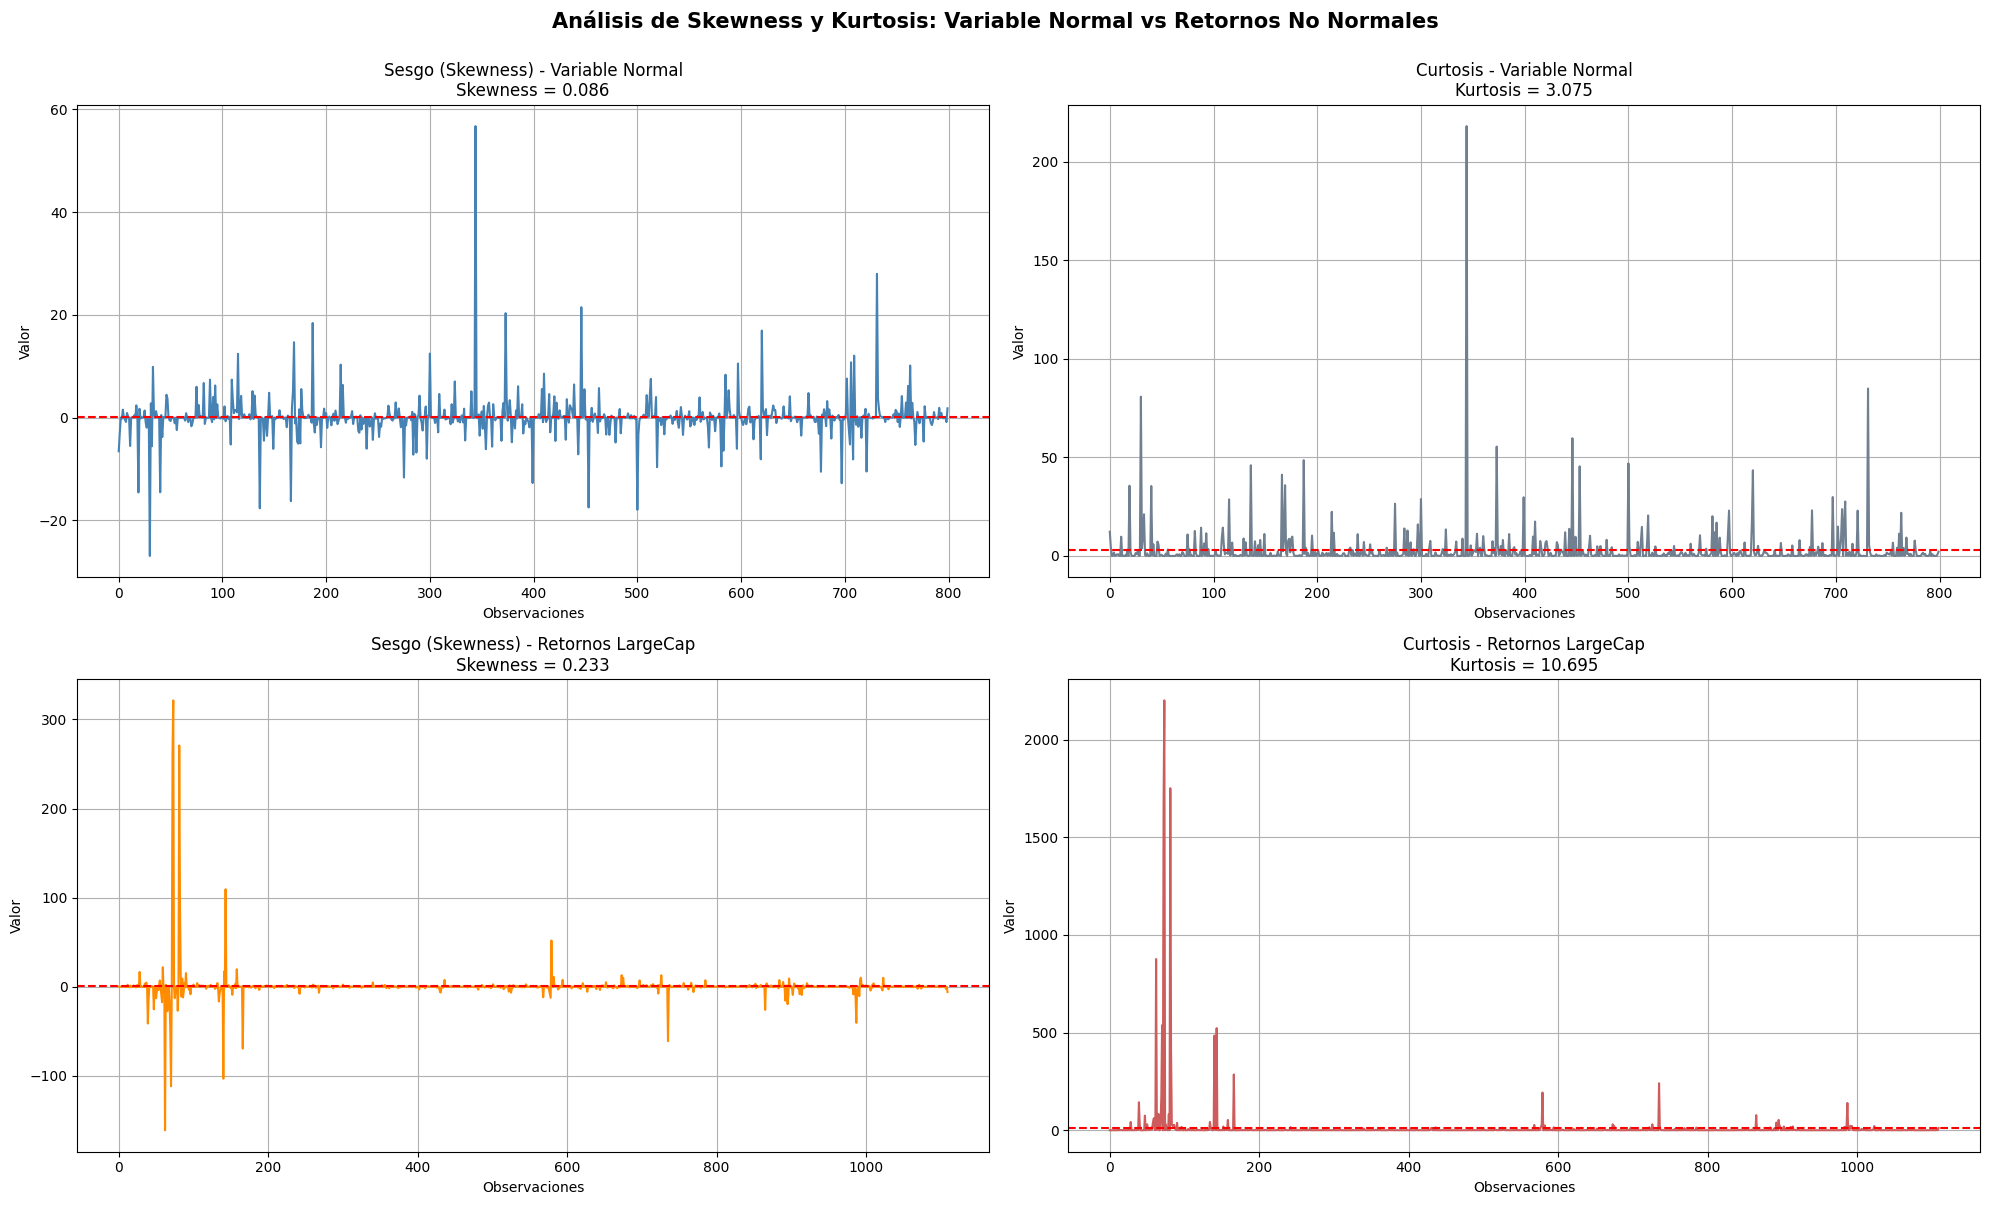

In [3]:
# Cálculo manual de Skewness y Kurtosis para A y B
S_A = ((A - A.mean())**3 / A.std(ddof=0)**3).mean().values[0]
K_A = ((A - A.mean())**4 / A.std(ddof=0)**4).mean().values[0]

S_B = ((B - B.mean())**3 / B.std(ddof=0)**3).mean()
K_B = ((B - B.mean())**4 / B.std(ddof=0)**4).mean()

# Gráfico
plt.figure(figsize=(20, 12))

# Skewness - Variable Normal A
plt.subplot(2, 2, 1)
plt.plot(((A - A.mean())**3 / A.std(ddof=0)**3).values, color='steelblue')
plt.axhline(y=S_A, linestyle='--', color='red', linewidth=1.5)
plt.title(f'Sesgo (Skewness) - Variable Normal\nSkewness = {S_A:.3f}', fontsize=12)
plt.xlabel('Observaciones')
plt.ylabel('Valor')
plt.grid(True)

# Kurtosis - Variable Normal A
plt.subplot(2, 2, 2)
plt.plot(((A - A.mean())**4 / A.std(ddof=0)**4).values, color='slategray')
plt.axhline(y=K_A, linestyle='--', color='red', linewidth=1.5)
plt.title(f'Curtosis - Variable Normal\nKurtosis = {K_A:.3f}', fontsize=12)
plt.xlabel('Observaciones')
plt.ylabel('Valor')
plt.grid(True)

# Skewness - Retornos LargeCap (B)
plt.subplot(2, 2, 3)
plt.plot(((B - B.mean())**3 / B.std(ddof=0)**3).values, color='darkorange')
plt.axhline(y=S_B, linestyle='--', color='red', linewidth=1.5)
plt.title(f'Sesgo (Skewness) - Retornos LargeCap\nSkewness = {S_B:.3f}', fontsize=12)
plt.xlabel('Observaciones')
plt.ylabel('Valor')
plt.grid(True)

# Kurtosis - Retornos LargeCap (B)
plt.subplot(2, 2, 4)
plt.plot(((B - B.mean())**4 / B.std(ddof=0)**4).values, color='indianred')
plt.axhline(y=K_B, linestyle='--', color='red', linewidth=1.5)
plt.title(f'Curtosis - Retornos LargeCap\nKurtosis = {K_B:.3f}', fontsize=12)
plt.xlabel('Observaciones')
plt.ylabel('Valor')
plt.grid(True)

# Título
plt.suptitle('Análisis de Skewness y Kurtosis: Variable Normal vs Retornos No Normales',fontweight='bold', fontsize=15, y=1)

plt.tight_layout()
plt.show()


Cargamos la base de datos de retornos mensuales de hedge funds (HFI).

In [4]:
hfi = erk.get_hfi_returns()
hfi

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02-28,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03-31,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04-30,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05-31,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-31,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08-31,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09-30,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


Calculamos el nivel de asimetría (skewness) y curtosis (kurtosis) de los diferentes índices de hedge funds.

In [5]:
hfi_skew_kurt = pd.DataFrame({
    'Skewness': hfi.aggregate(erk.skewness),
    'Kurtosis': hfi.aggregate(erk.kurtosis)
})
hfi_skew_kurt

,Skewness,Kurtosis
Convertible Arbitrage,-2.639592,23.280834
CTA Global,0.173699,2.952960
Distressed Securities,-1.300842,7.889983
Emerging Markets,-1.167067,9.250788
Equity Market Neutral,-2.124435,17.218555
Event Driven,-1.409154,8.035828
Fixed Income Arbitrage,-3.940320,29.842199
Global Macro,0.982922,5.741679
Long/Short Equity,-0.390227,4.523893
Merger Arbitrage,-1.320083,8.738950


¿La distribución de los retornos de un índice hedge fund es normal según la prueba de Jarque-Bera? Compruebe para dos índices.

In [15]:
# CTA Global
# Extraemos el primer valor de la tupla [0] que es el estadístico JB
jb_stat_cta = stats.jarque_bera(hfi['CTA Global'])[0]
print(f'CTA Global - JB Test: {jb_stat_cta:.2f}')
print(f'¿Es normal?: {erk.is_normal(hfi["CTA Global"])}')

# Convertible Arbitrage
jb_stat_ca = stats.jarque_bera(hfi['Convertible Arbitrage'])[0]
print(f'\nConvertible Arbitrage - JB Test: {jb_stat_ca:.2f}')
print(f'¿Es normal?: {erk.is_normal(hfi["Convertible Arbitrage"])}')

CTA Global - JB Test: 1.35
¿Es normal?: True

Convertible Arbitrage - JB Test: 4812.70
¿Es normal?: False


¿Qué índices hedge fund siguen una distribución normal (según Jarque-Bera)?

In [16]:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

Halle la semivolatilidad (solo para retornos negativos) de los índices HFI.

In [17]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

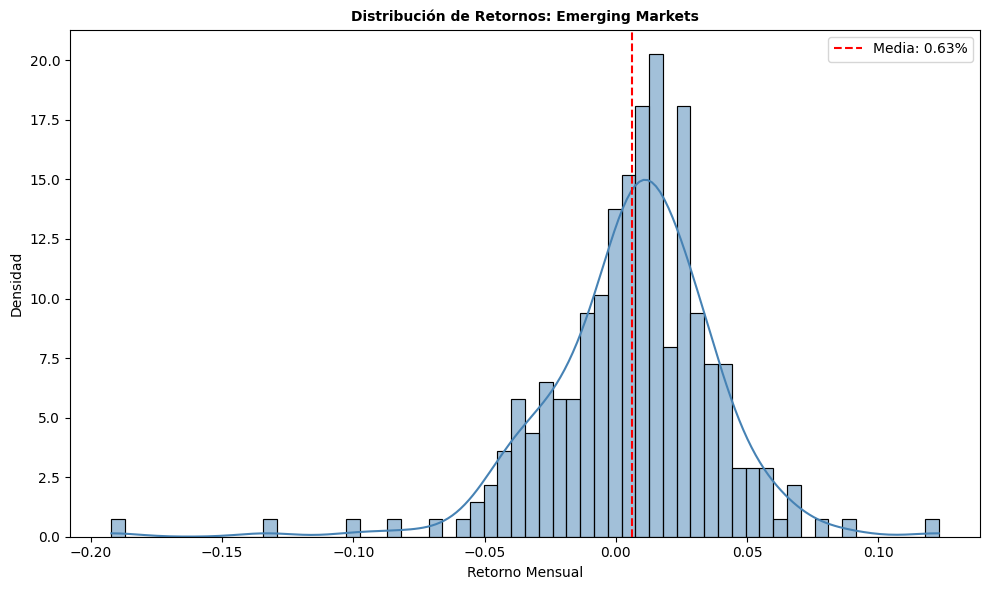

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(hfi['Emerging Markets'], bins=60, kde=True, color='steelblue', stat='density', ax=ax)

media = hfi['Emerging Markets'].mean()

ax.set_title('Distribución de Retornos: Emerging Markets', fontsize=10, fontweight='bold')
ax.set_xlabel('Retorno Mensual', fontsize=10)
ax.set_ylabel('Densidad', fontsize=10)

ax.axvline(media, color='red', linestyle='--', linewidth=1.5, label=f"Media: {media:.2%}")

ax.legend(frameon=True)
plt.tight_layout()
plt.show()

En lo siguiente utilice el índice CTA Global.

¿Cómo es la distribución de los retornos del índice 'CTA Global'?

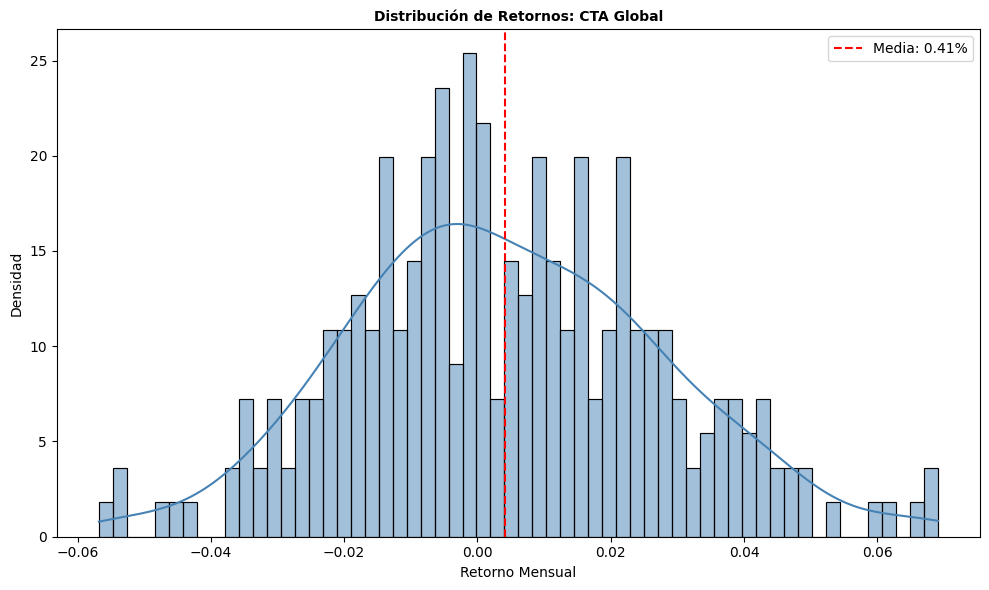

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(hfi['CTA Global'], bins=60, kde=True, color='steelblue', stat='density', ax=ax)

media = hfi['CTA Global'].mean()

ax.set_title('Distribución de Retornos: CTA Global', fontsize=10, fontweight='bold')
ax.set_xlabel('Retorno Mensual', fontsize=10)
ax.set_ylabel('Densidad', fontsize=10)

ax.axvline(media, color='red', linestyle='--', linewidth=1.5, label=f"Media: {media:.2%}")

ax.legend(frameon=True)
plt.tight_layout()
plt.show()

¿Cuál es el Valor en Riesgo (VaR) histórico para el índice CTA Global a diferentes niveles de confianza?

In [26]:
alpha = np.array([0.90, 0.95, 0.99])
level = 1 - alpha

VaRs = -np.percentile(hfi["CTA Global"], level * 100)

for i, a in enumerate(alpha):
    print(f"{int(a*100)}% VaR histórico: {VaRs[i]*100:.2f}%")

90% VaR histórico: 2.41%
95% VaR histórico: 3.17%
99% VaR histórico: 4.95%


¿Cuál es el VaR mensual Gaussiano al 95% para todos los índices hedge fund?

In [27]:
alpha = 0.95
erk.var_gaussian(hfi, level=(1 - alpha) * 100)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

¿Cuál es el VaR mensual Gaussiano al 95% usando la corrección de Cornish-Fisher?

In [28]:
alpha = 0.95
erk.var_gaussian(hfi, level=(1 - alpha) * 100, modified=True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

¿Cuál es el CVaR (Conditional VaR) histórico mensual para los índices HFI?

In [29]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

9. Compare metodologías del el cálculo del VAR para cada índice.

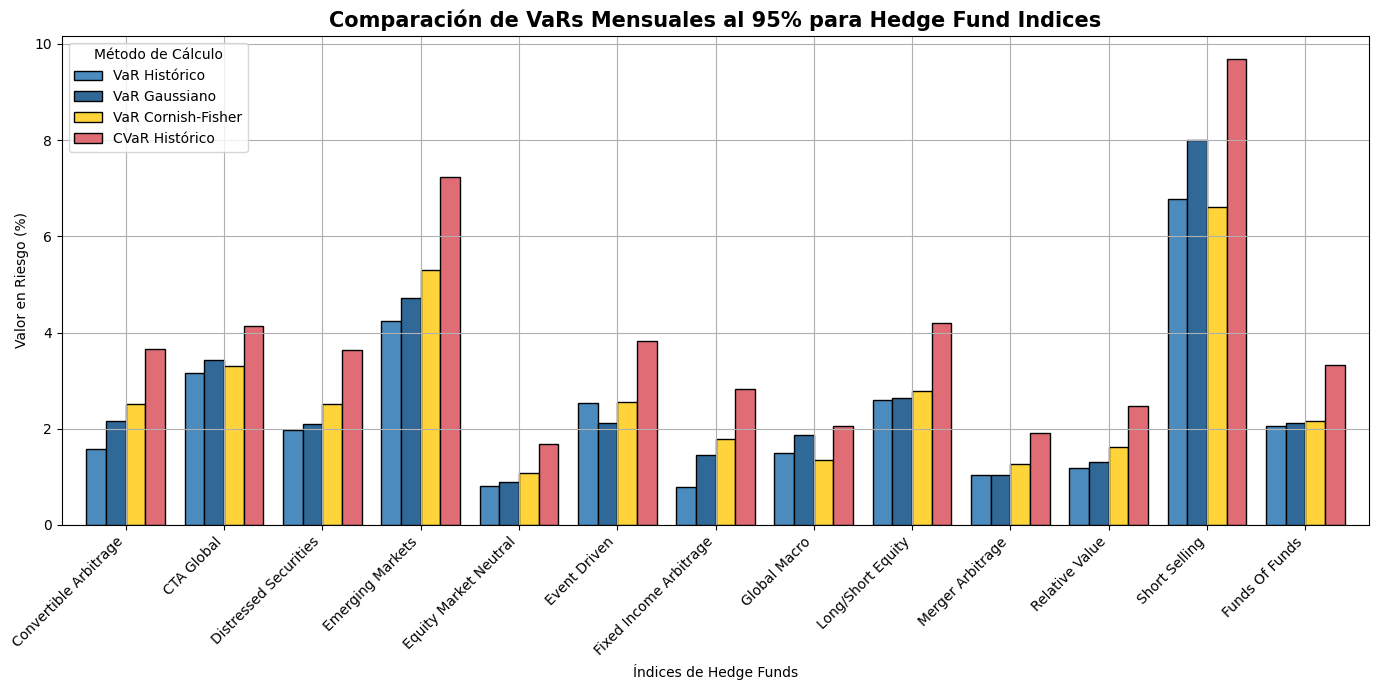

In [34]:
comparevars = pd.concat([
    erk.var_historic(hfi),
    erk.var_gaussian(hfi),
    erk.var_gaussian(hfi, modified=True),
    erk.cvar_historic(hfi)
], axis=1)

comparevars.columns = ['VaR Histórico', 'VaR Gaussiano', 'VaR Cornish-Fisher', 'CVaR Histórico']

# Crear gráfico de barras
ax = (comparevars * 100).plot.bar(
    figsize=(14, 7),
    grid=True,
    width=0.8,
    color=['#4B8BBE', '#306998', '#FFD43B', '#E06C75'],
    edgecolor='black'
)

ax.set_title('Comparación de VaRs Mensuales al 95% para Hedge Fund Indices', fontsize=15, fontweight='bold')
ax.set_ylabel('Valor en Riesgo (%)', fontsize=10)
ax.set_xlabel('Índices de Hedge Funds', fontsize=10)

ax.legend(title='Método de Cálculo', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
